385.0
['September', 'October', 'October', 'October', 'October', 'October', 'November', 'November', 'November', 'November', 'December', 'December', 'December', 'December', 'January', 'January', 'January', 'January', 'January', 'February', 'February', 'February', 'February', 'February']


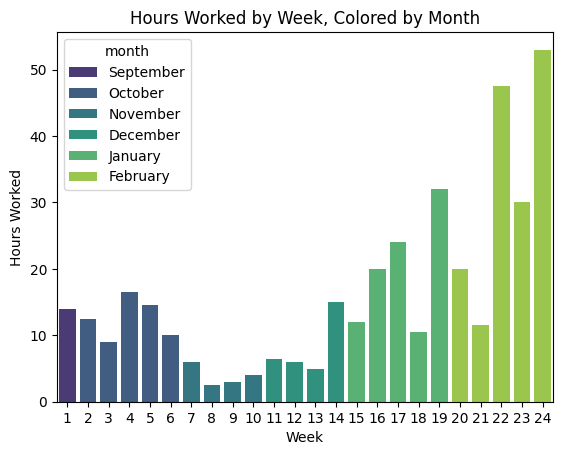

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import color_palette
import numpy as np
# Graph 1: Neel's working hours
# this plots my hours worked by month. was written by Bard!

weeks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
hours_worked = [14, 12.5, 9, 16.5, 14.5, 10, 6, 2.5, 3, 4, 6.5, 6, 5, 15, 12, 20, 24, 10.5, 32, 20, 11.5, 47.5, 30, 53]
#months = [9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11]
print(f"{np.sum(hours_worked)}")
months = ["September"]
for i in range(5):
    months.append("October")
for i in range(4):
    months.append("November")
for i in range(4):
    months.append("December")
for i in range(5):
    months.append("January")
for i in range(5):
    months.append("February")

print(months)
# Create a dataframe from the data
df = pd.DataFrame({"week": weeks, "hours_worked": hours_worked, "month": months})
# Specify a logical color palette
palette = color_palette("viridis", len(df["month"].unique()))
# Create the bar chart
sns.barplot(x="week", y="hours_worked", hue="month", data=df, palette=palette)
plt.xlabel("Week")
plt.ylabel("Hours Worked")
plt.title("Hours Worked by Week, Colored by Month")
# Show the chart
plt.show()

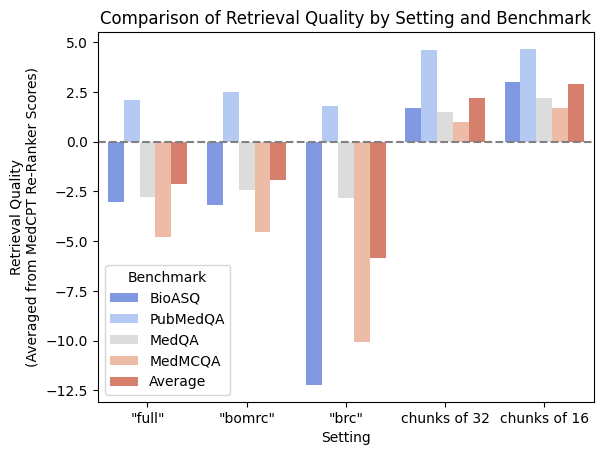

In [ ]:
# Graph 2: Average retrieval quality on different retrieval settings (with all benchmarks)
#this plots the average retrieval quality of full, bomrc, brc, input_segmentation_32, input_segmentation_16
#data in this was collected on 09.01.24 by calling all 486 questions in BioASQ5b, and 500 questions in MedQA.
#for each of them, top 5 were retrieved and reranked with the MedCPT Re-Ranker. the top chunk and its score were noted
#at the end, the average of these scores was noted as "average retrieval quality"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mode = ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"]

# Define the dataframes
data1 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-3.0362098, -3.1872854, -12.228864, 1.7101222, 3.02405],
        'Benchmark': ["BioASQ"] * 5}
df1 = pd.DataFrame(data1)
data2 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [2.1173124, 2.4807162, 1.7723576, 4.6062207, 4.6623235],
        'Benchmark': ["PubMedQA"] * 5}
df2 = pd.DataFrame(data2)
data3 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-2.7683034,-2.4228208,-2.8325806,1.5045198, 2.1952846],
        'Benchmark': ["MedQA"] * 5}
df3 = pd.DataFrame(data3)
data4 = {'Setting': ["\"full\"", "\"bomrc\"", "\"brc\"", "chunks of 32", "chunks of 16"],
        'Avg. retrieval quality': [-4.8010774,-4.523125, -10.081551, 1.0107652, 1.6785029],
        'Benchmark': ["MedMCQA"] * 5}
df4 = pd.DataFrame(data4)

df = pd.concat([df1, df2, df3, df4])
avg_df = df.groupby('Setting')['Avg. retrieval quality'].mean().reset_index()
avg_df['Benchmark'] = 'Average'
df = pd.concat([df, avg_df])
palette = sns.color_palette("coolwarm", n_colors=len(df['Benchmark'].unique()))
sns.barplot(x="Setting", y="Avg. retrieval quality", hue="Benchmark", palette=palette, data=df)
plt.xticks(rotation=0)
plt.title("Comparison of Retrieval Quality by Setting and Benchmark")
plt.xlabel("Setting")
plt.ylabel("Retrieval Quality\n(Averaged from MedCPT Re-Ranker Scores)")
plt.axhline(0, color='gray', linestyle='--')

# Show the plot
plt.show()

{'1975': 249054, '1976': 255302, '1977': 262345, '1978': 272331, '1979': 282247, '1992': 418081, '1991': 413329, '1990': 410751, '1993': 426839, '1985': 335427, '1986': 349775, '1987': 367876, '1988': 386980, '1989': 402988, '1970': 219451, '1969': 215430, '1968': 208181, '1967': 191976, '1971': 223535, '1964': 162083, '1966': 180109, '1972': 227999, '1973': 231167, '1974': 235168, '1965': 176841, '1963': 141563, '1962': 125700, '1961': 120177, '1960': 112224, '1984': 318317, '1982': 295855, '1983': 309479, '1981': 283457, '1980': 280824, '1995': 449058, '1994': 438106, '1996': 458920, '1997': 398348, '2002': 605844, '1998': 437071, '2000': 499154, '1999': 456720, '2001': 541527, '2004': 631378, '2003': 610613, '1956': 107017, '1953': 108817, '1954': 106079, '1950': 85787, '1958': 109468, '1944': 4791, '1938': 5874, '1959': 109970, '1928': 5579, '1951': 103886, '1949': 62816, '1935': 5769, '1937': 5428, '1955': 108389, '1902': 4739, '1925': 5093, '1946': 53911, '1957': 111533, '1942': 

/tmp/ipykernel_350874/1168993600.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Year", y="Total", data=df, palette=palette)


Average number of tokens per paper: 241.14119494072503
Number of papers to get to 2 billion tokens: 8293896.032536541


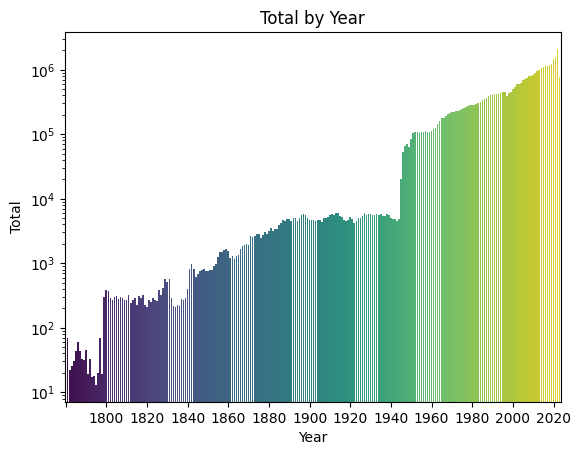

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from seaborn import color_palette
# load total_year_dict.json
with open('vectorstores/pma_years/total_year_dict.json') as f:
    data = json.load(f)
print(data)
# Create a dataframe from the data
df = pd.DataFrame(data.items(), columns=['Year', 'Total'])
df = df.sort_values(by=['Year'])
total_num_papers = np.sum(df['Total'])
print(f"Total number of papers: {total_num_papers}")
palette = color_palette("viridis", len(df["Year"].unique()))
sns.barplot(x="Year", y="Total", data=df, palette=palette)
plt.yscale("log")
plt.xlabel("Year")
plt.ylabel("Total")
plt.title("Total by Year")
# make x-axis labels less frequent:
plt.xticks(np.arange(0, len(df["Year"].unique()), 20))

global_num_tokens = 8809702185
avg_tokens_per_paper = global_num_tokens / total_num_papers
print(f"Average number of tokens per paper: {avg_tokens_per_paper}")
#num papers to get to 2 billion tokens
num_papers_to_2b = 2000000000 / avg_tokens_per_paper
print(f"Number of papers to get to 2 billion tokens: {num_papers_to_2b}")

# 8 293 896

# Show the chart
plt.show()

/tmp/ipykernel_350874/1221643539.py:20: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)


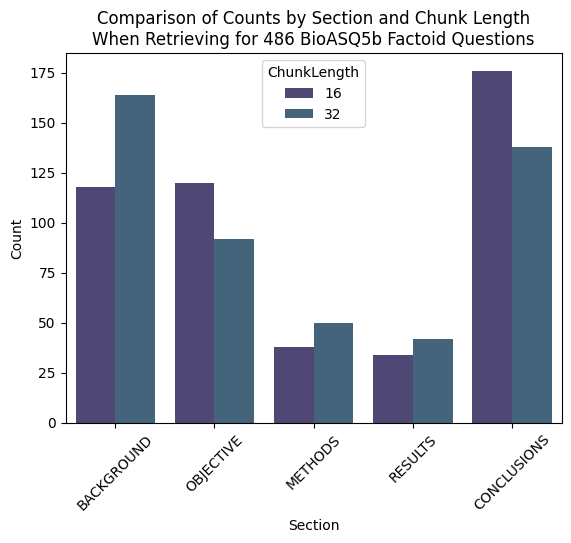

In [ ]:
# Graph 3: Where do we retrieve from when considering bioASQ questions?
# this plots the distribution of chunks over sections on BioASQ5b chunk_length=16 and 32
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataframes
data1 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [164, 92, 50, 42, 138],
        'ChunkLength': [32] * 5}
df1 = pd.DataFrame(data1)
data2 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [118, 120, 38, 34, 176],
        'ChunkLength': [16] * 5}
df2 = pd.DataFrame(data2)
# Combine the DataFrames
df = pd.concat([df1, df2])

palette = sns.color_palette("viridis", n_colors=5, desat=0.8)  # Adjust desat as needed
sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)
plt.xticks(rotation=45)
# Add a title and labels
plt.title("Comparison of Counts by Section and Chunk Length\nWhen Retrieving for 486 BioASQ5b Factoid Questions")
plt.xlabel("Section")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_350874/2488910688.py:19: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)


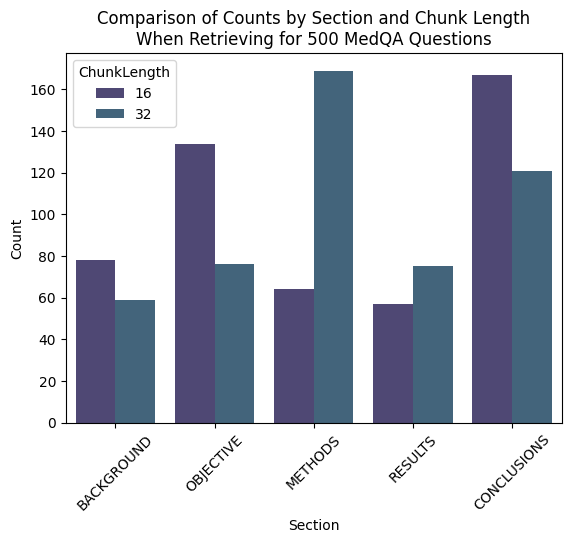

In [ ]:
# Graph 4: Where do we retrieve from when considering MedQA questions?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the dataframes
data1 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [59, 76, 169, 75, 121],
        'ChunkLength': [32] * 5}
df1 = pd.DataFrame(data1)
data2 = {'Section': ['BACKGROUND', 'OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS'],
        'Count': [78, 134, 64, 57, 167],
        'ChunkLength': [16] * 5}
df2 = pd.DataFrame(data2)
df = pd.concat([df1, df2])

# Create a custom color palette with adjusted saturation
palette = sns.color_palette("viridis", n_colors=5, desat=0.8)  # Adjust desat as needed
sns.barplot(x="Section", y="Count", hue="ChunkLength", palette=palette, data=df)

plt.xticks(rotation=45)
plt.title("Comparison of Counts by Section and Chunk Length\nWhen Retrieving for 500 MedQA Questions")
plt.xlabel("Section")
plt.ylabel("Count")
plt.show()

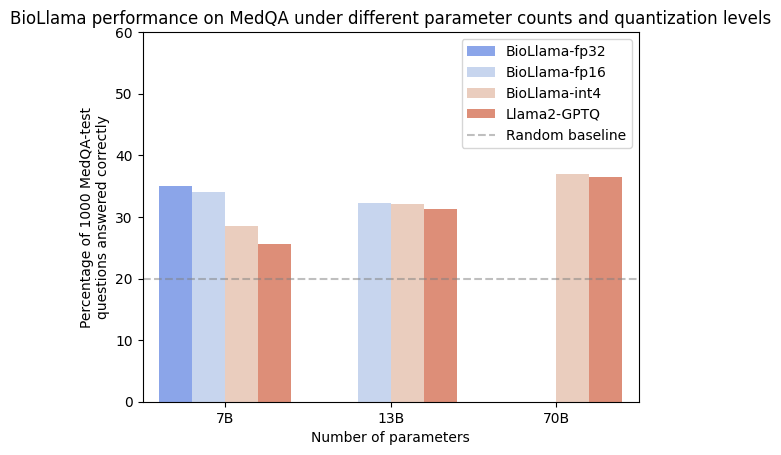

In [ ]:
# Graph 2: Average retrieval quality on different retrieval settings (with all benchmarks)
#this plots the average retrieval quality of full, bomrc, brc, input_segmentation_32, input_segmentation_16
#data in this was collected on 09.01.24 by calling all 486 questions in BioASQ5b, and 500 questions in MedQA.
#for each of them, top 5 were retrieved and reranked with the MedCPT Re-Ranker. the top chunk and its score were noted
#at the end, the average of these scores was noted as "average retrieval quality"

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
mode = ["7B", "13B", "70B"]
data1 = {'Parameter count': ["7B", "13B", "70B"],
        'MedQA Performance': [35, 0, 0],
        'Benchmark': ["BioLlama-fp32"] * 3}
df1 = pd.DataFrame(data1)
data2 = {'Parameter count': ["7B", "13B", "70B"],
        'MedQA Performance': [34, 32.2, 0],
        'Benchmark': ["BioLlama-fp16"] * 3}
df2 = pd.DataFrame(data2)
data3 = {'Parameter count': ["7B", "13B", "70B"],
        'MedQA Performance': [28.5, 32.1, 37],
        'Benchmark': ["BioLlama-int4"] * 3}
df3 = pd.DataFrame(data3)
data4 = {'Parameter count': ["7B", "13B", "70B"],
        'MedQA Performance': [25.6, 31.3, 36.4],
        'Benchmark': ["Llama2-GPTQ"] * 3}
df4 = pd.DataFrame(data4)
df = pd.concat([df1, df2, df3, df4])

palette = sns.color_palette("coolwarm", n_colors=len(df['Benchmark'].unique()))
sns.barplot(x="Parameter count", y="MedQA Performance", hue="Benchmark", palette=palette, data=df)
plt.ylim(0, 60)
plt.xticks(rotation=0)
plt.title("BioLlama performance on MedQA under different parameter counts and quantization levels")
plt.xlabel("Number of parameters")
plt.ylabel("Percentage of 1000 MedQA-test\nquestions answered correctly")
plt.axhline(20, color='gray', linestyle='--', alpha=0.5, label='Random baseline')
plt.legend()
plt.show()

In [15]:
import pandas as pd
# from utilities.parse_benchmark import parse_benchmark 
# MedMCQA = parse_benchmark("MedMCQA")
# load into dataframe
# df = pd.DataFrame(MedMCQA)
# switch from 2 rows × 182822 columns to 182822 rows × 2 columns
# df = df.T
# df[10:15]
import json 
counter = 0
train = []
with open('benchmarks/MedMCQA/train.json', 'r') as file:
    for line in file:
        if counter < 2000:
            json_obj = json.loads(line)
            train.append(json_obj)
            counter += 1
#convert to dataframe
train_df = pd.DataFrame(train[10:1010])
train_df.head()

,question,exp,cop,opa,opb,opc,opd,subject_name,topic_name,id,choice_type
0,Naglers reaction is shown by,Nagler's reaction - when Clostridium perfringe...,3,Clostridium tetani,Clostridium botulinum,Clostridium perfringens,Clostridium septicum,Microbiology,Bacteriology,b3d1eb6c-3909-4011-ad10-d55538b81456,single
1,Which of the following statements are True/Fal...,Here statement 1 & 3 are wrong. It is actually...,3,"1, 2, 3 True & 4, 5 false","1, 3, 5 True & 2, 4 false","2, 4, 5 True & 1, 3 false","1, 2, 3, 4 True & 5 false",Medicine,None,e529be7c-f360-4dba-b313-7f3fc240697a,multi
2,The pharmakokinetic change occurring in geriat...,One of the most impoant pharmacokinetic change...,3,Gastric absorption,Liver metabolism,Renal clearance,Hypersensitivity,Anatomy,General anatomy,4e6de6fe-8c69-4553-827d-417ce597f3ac,single
3,True regarding lag phase is?,Lag phase: Immediately following the seeding o...,1,Time taken to adpt in the new environment,Growth occurs exponentially,The plateau in lag phase is due to cell death,It is the 2nd phase in bacterial growth curve,Microbiology,general microbiology,d64eabcf-da66-438f-a53f-7137d3bba9dd,multi
4,A 60 yr old chronic smoker presents with painl...,"Urine microscopy for malignant cytology ""Painl...",4,USG,X-ray KUB,Urine routine,Urine microscopy for malignant cytology cells,Surgery,None,35a7eac4-fd96-4184-9a5f-86bba82a5b62,single


In [56]:
# load json file "output/BioLlama-13B-finetune-MedMCQA.json"
import json
with open('output/BioLlama-13B-finetune-MedMCQA.json') as f:
    data = json.load(f)
print(len(data))
output = []
for elt in data:
    elt[2] = elt[2][2]
    output.append(elt)
BioLlama_13b_output = pd.DataFrame(output)
BioLlama_13b_output.head()
BioLlama_13b_output.columns = ["question", "cop", "BioLlama-13B-finetuned response"]
# BioLlama_13b_output.head()
with open('output/Llama-2-13B-chat-GPTQ-MedMCQA.json') as f:
    Llama2 = json.load(f)
Llama2_13b_output = pd.DataFrame(Llama2)
Llama2_13b_output.columns = ["question", "cop", "Llama-2-13B-finetuned response"]
# on column Llama-2-13B-finetuned response, drop whitespace
Llama2_13b_output["Llama-2-13B-finetuned response"] = Llama2_13b_output["Llama-2-13B-finetuned response"].str.strip()
Llama_v_BioLlama = BioLlama_13b_output.merge(Llama2_13b_output, on=["question", "cop"])
Llama_v_BioLlama

1000


,question,cop,BioLlama-13B-finetuned response,Llama-2-13B-finetuned response
0,Naglers reaction is shown by\n (1) Clostridium...,3,1,3
1,Which of the following statements are True/Fal...,3,2,3
2,The pharmakokinetic change occurring in geriat...,3,3,3
3,True regarding lag phase is?\n (1) Time taken ...,1,4,2
4,A 60 yr old chronic smoker presents with painl...,4,1,3
...,...,...,...,...
995,Hypertrophy means -\n (1) Increased protein co...,2,2,2
996,A patient was diagnosed with schizophrenia and...,2,2,2
997,Risk factor prevention at which level\n (1) Pr...,1,3,2
998,Venous drainage of upper pa of uterus and plac...,1,3,3


In [70]:
with_subjects = pd.concat([Llama_v_BioLlama, train_df[["subject_name"]]], axis=1)

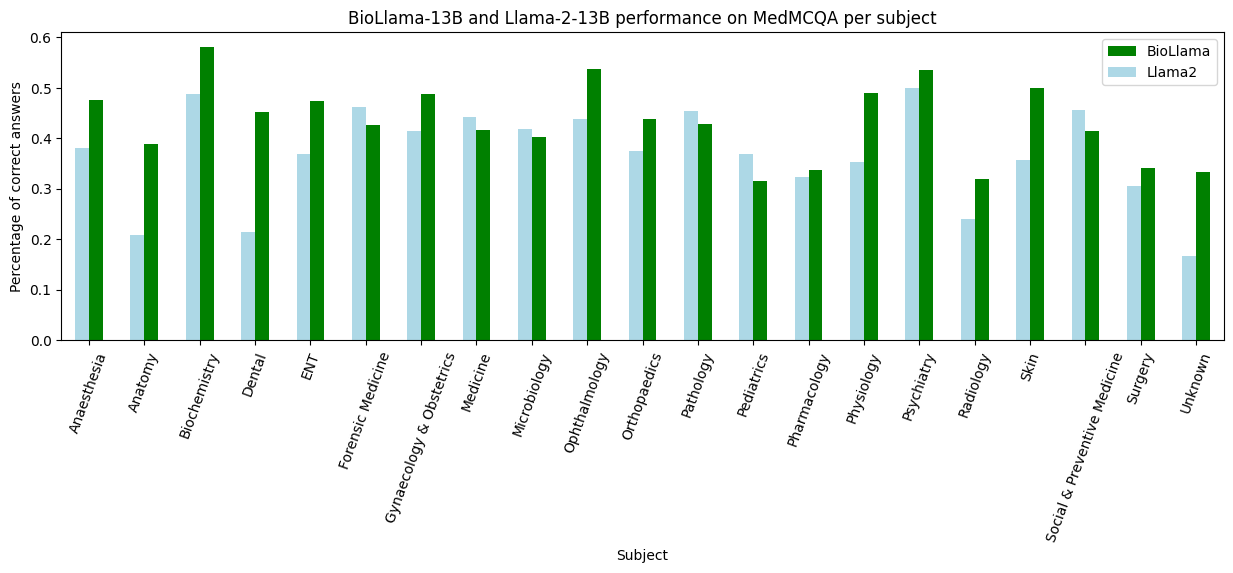

In [133]:
with_subjects["BioLlama_correct"] = with_subjects["cop"] == with_subjects["BioLlama-13B-finetuned response"]
with_subjects["Llama2_correct"] = with_subjects["cop"] == with_subjects["Llama-2-13B-finetuned response"]
with_subjects[100:120]
# drop columns BioLlama-13B-finetuned response and Llama-2-13B-finetuned response
with_subjects_2 = with_subjects.drop(columns=["BioLlama-13B-finetuned response", "Llama-2-13B-finetuned response"])
with_subjects_2.head()
# group by subject_name
grouped = with_subjects_2.groupby("subject_name")
# per subject name, calculate the percentage of correct answers for BioLlama and Llama2
grouped_correct = grouped[["BioLlama_correct", "Llama2_correct"]].mean()

# sort subject names alphabetically in descending order
grouped_correct_sorted = grouped_correct.sort_index(ascending=False)
import matplotlib.pyplot as plt

# plot this where llama2 is in dark blue and biollama is in green
grouped_correct_sorted.plot(kind="bar", color=["green", "lightblue"], figsize=(15, 4))

# print(grouped_correct_sorted)

# Create a custom color palette with adjusted saturation

# Add a title and labels
plt.title("BioLlama-13B and Llama-2-13B performance on MedMCQA per subject")
plt.xlabel("Subject")
plt.ylabel("Percentage of correct answers")
# switch the two so that Llama2 shows on the left and BioLlama shows on the right
plt.gca().invert_xaxis()
# change legend to show "BioLlama" and "Llama2"
plt.legend(["BioLlama", "Llama2"])

#angle the x-axis labels
plt.xticks(rotation=70)
plt.show()

/tmp/ipykernel_371317/1806556364.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="question", y="subject_name", data=df, palette=palette)


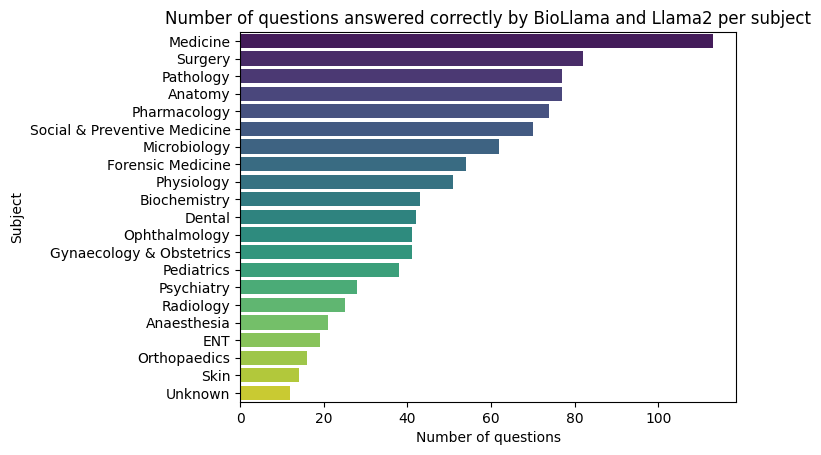

In [34]:
#use Llama_v_BioLlama_with_subjects to plot the number of questions answered correctly by BioLlama and Llama2 per subject_name
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Create a dataframe from the data
df = Llama_v_BioLlama_with_subjects
df = df.groupby('subject_name').count().reset_index()
df = df[["subject_name", "question"]]
df = df.sort_values(by=['question'], ascending=False)
# Specify a logical color palette
palette = sns.color_palette("viridis", len(df["subject_name"].unique()))
# Create the bar chart
sns.barplot(x="question", y="subject_name", data=df, palette=palette)
plt.xlabel("Number of questions")
plt.ylabel("Subject")
plt.title("Number of questions answered correctly by BioLlama and Llama2 per subject")
# Show the chart
plt.show()


/tmp/ipykernel_395362/2726237346.py:45: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="Benchmark", y="Performance", hue="Model", data=df, palette=palette)


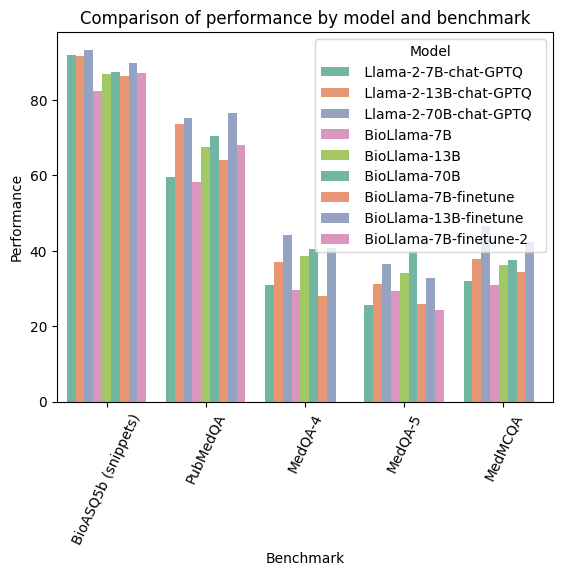

In [34]:
results = """
| Model                  | Size   | BioASQ5b (snippets)   | PubMedQA   | MedQA-4   | MedQA-5   | MedMCQA   |
|:-----------------------|:-------|:----------------------|:-----------|:----------|:----------|:----------|
| Llama-2-7B-chat-GPTQ   | 7B     | 91.91                 | 59.49      | 30.9      | 25.6      | 32.1      |
| Llama-2-13B-chat-GPTQ  | 13B    | 91.70                 | 73.74      | 36.9      | 31.3      | 37.8      |
| Llama-2-70B-chat-GPTQ  | 70B    | 93.4                  | 75.35      | 44.3      | 36.4      | 46.6      |
| BioLlama-7B            | 7B     | 82.34                 | 58.3       | 29.6      | 29.4      | 31.0      |
| BioLlama-13B           | 13B    | 87.02                 | 67.5       | 38.5      | 34.0      | 36.1      |
| BioLlama-70B           | 70B    | 87.45                 | 70.4       | 40.4      | 40.0      | 37.6      |
| BioLlama-7B-finetune   | 7B     | 86.46                 | 64.2       | 28.0      | 25.8      | 34.4      |
| BioLlama-13B-finetune  | 13B    | 89.79                 | 76.5       | 40.8      | 32.9      | 42.3      |
| BioLlama-7B-finetune-2 | 7B     | 87.29                 | 68.2       |           | 24.2      |           |
"""
# convert the above string into a dataframe
import pandas as pd
from io import StringIO
df = pd.read_csv(StringIO(results), sep="|")
# print(df)
df = df.reset_index(drop=True)
df = df.rename(columns={" Model                  ": "Model", " Size   ": "Size", " BioASQ5b (snippets)   ": "BioASQ5b (snippets)", " PubMedQA   ": "PubMedQA", " MedQA-4   ": "MedQA-4", " MedQA-5   ": "MedQA-5", " MedMCQA   ": "MedMCQA"})
#drop column "Unnamed: 0" here:
df.drop(columns=["Unnamed: 0", "Unnamed: 8"], inplace=True)
# remove first row:
df = df[1:]

# convert the strings of numbers to just numbers
df["BioASQ5b (snippets)"] = df["BioASQ5b (snippets)"].str.extract('(\d+.\d+)')
df["PubMedQA"] = df["PubMedQA"].str.extract('(\d+.\d+)')
df["MedQA-4"] = df["MedQA-4"].str.extract('(\d+.\d+)')
df["MedQA-5"] = df["MedQA-5"].str.extract('(\d+.\d+)')
df["MedMCQA"] = df["MedMCQA"].str.extract('(\d+.\d+)')



import seaborn as sns
import matplotlib.pyplot as plt
df["BioASQ5b (snippets)"] = pd.to_numeric(df["BioASQ5b (snippets)"])
df["PubMedQA"] = pd.to_numeric(df["PubMedQA"])
df["MedQA-4"] = pd.to_numeric(df["MedQA-4"])
df["MedQA-5"] = pd.to_numeric(df["MedQA-5"])
df["MedMCQA"] = pd.to_numeric(df["MedMCQA"])
df = df.melt(id_vars=["Model", "Size"], value_vars=["BioASQ5b (snippets)", "PubMedQA", "MedQA-4", "MedQA-5", "MedMCQA"], var_name="Benchmark", value_name="Performance")
palette = sns.color_palette("Set2", len(df["Benchmark"].unique()))

sns.barplot(x="Benchmark", y="Performance", hue="Model", data=df, palette=palette)
plt.xticks(rotation=65)
plt.title("Comparison of performance by model and benchmark")
plt.xlabel("Benchmark")
plt.ylabel("Performance")
# Show the chart
plt.show()

